In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import sys
import wave
from scipy.io.wavfile import read
from python_speech_features import delta 
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

from utils import label_encoder
from features_extraction import mfcc_features
# from sklearn import preprocessing
# from pncc import pncc
# from sklearn.model_selection import train_test_split
# from sklearn.externals.six.moves import xrange
# from sklearn.mixture import GaussianMixture as GMM
# from keras.layers import Dense
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import LSTM
# from keras.models import Sequential
# from keras.layers import Dropout
# from numpy import asarray
# from numpy import save
# from numpy import load
# from keras import regularizers

In [3]:
DATA_RAW_DIR = '../data/raw/ST-AEDS'

In [4]:
# Create the pandas DataFrame 
df = pd.DataFrame(columns = ['path', 'gender']) 

In [5]:
male_list = []
female_list = []
for filename in os.listdir(DATA_RAW_DIR):
    if filename.startswith("m"):
        male_list.append(os.path.join(DATA_RAW_DIR, filename))
    if filename.startswith("f"):
        female_list.append(os.path.join(DATA_RAW_DIR, filename))

In [6]:
for i in range(len(male_list)):
    df = df.append({'path' : male_list[i] , 'gender' : 'male'} , ignore_index=True)

In [7]:
for i in range(len(female_list)):
    df = df.append({'path' : female_list[i] , 'gender' : 'female'} , ignore_index=True)

In [8]:
df.head(7)

,path,gender
0,../data/raw/ST-AEDS/m0003_us_m0003_00262.wav,male
1,../data/raw/ST-AEDS/m0005_us_m0005_00026.wav,male
2,../data/raw/ST-AEDS/m0004_us_m0004_00008.wav,male
3,../data/raw/ST-AEDS/m0003_us_m0003_00259.wav,male
4,../data/raw/ST-AEDS/m0002_us_m0002_00308.wav,male
5,../data/raw/ST-AEDS/m0003_us_m0003_00233.wav,male
6,../data/raw/ST-AEDS/m0003_us_m0003_00311.wav,male


In [9]:
df['gender'] = label_encoder(df['gender'])

In [10]:
df['mfcc'] = ''
df

,path,gender,mfcc
0,../data/raw/ST-AEDS/m0003_us_m0003_00262.wav,1,
1,../data/raw/ST-AEDS/m0005_us_m0005_00026.wav,1,
2,../data/raw/ST-AEDS/m0004_us_m0004_00008.wav,1,
3,../data/raw/ST-AEDS/m0003_us_m0003_00259.wav,1,
4,../data/raw/ST-AEDS/m0002_us_m0002_00308.wav,1,
...,...,...,...
3837,../data/raw/ST-AEDS/f0005_us_f0005_00099.wav,0,
3838,../data/raw/ST-AEDS/f0001_us_f0001_00042.wav,0,
3839,../data/raw/ST-AEDS/f0005_us_f0005_00014.wav,0,
3840,../data/raw/ST-AEDS/f0004_us_f0004_00075.wav,0,


In [11]:
mfcc_feature = mfcc_features()
df['mfcc']= df.apply(lambda x: mfcc_feature.get_features(x['path'].split('/')[-1]), axis=1 ) 
# mfcc_feature.get_features()

39)
359
(523, 39)
523
(523, 39)
523
(567, 39)
567
(487, 39)
487
(507, 39)
507
(259, 39)
259
(435, 39)
435
(363, 39)
363
(291, 39)
291
(483, 39)
483
(255, 39)
255
(439, 39)
439
(395, 39)
395
(319, 39)
319
(383, 39)
383
(383, 39)
383
(527, 39)
527
(415, 39)
415
(519, 39)
519
(243, 39)
243
(575, 39)
575
(291, 39)
291
(399, 39)
399
(403, 39)
403
(279, 39)
279
(355, 39)
355
(379, 39)
379
(435, 39)
435
(343, 39)
343
(339, 39)
339
(427, 39)
427
(455, 39)
455
(439, 39)
439
(559, 39)
559
(503, 39)
503
(531, 39)
531
(303, 39)
303
(227, 39)
227
(327, 39)
327
(287, 39)
287
(235, 39)
235
(567, 39)
567
(443, 39)
443
(383, 39)
383
(539, 39)
539
(367, 39)
367
(259, 39)
259
(335, 39)
335
(235, 39)
235
(351, 39)
351
(443, 39)
443
(399, 39)
399
(511, 39)
511
(323, 39)
323
(499, 39)
499
(335, 39)
335
(463, 39)
463
(291, 39)
291
(443, 39)
443
(399, 39)
399
(411, 39)
411
(471, 39)
471
(447, 39)
447
(607, 39)
607
(227, 39)
227
(547, 39)
547
(363, 39)
363
(371, 39)
371
(423, 39)
423
(271, 39)
271
(415, 39)
41

In [12]:
df.iloc[0,:]

path           ../data/raw/ST-AEDS/m0003_us_m0003_00262.wav
gender                                                    1
mfcc      [[-0.7827376597735857, -0.7934419021947432, -0...
Name: 0, dtype: object

In [13]:
df.loc[0,'mfcc'].shape

(627, 39)

In [14]:
df['len'] = ''

In [118]:
for i in range(len(df['mfcc'])):
    df['len'][i] = len(df['mfcc'][i])

In [119]:
df.head(1)['len']

0    627
Name: len, dtype: object

In [120]:
max_length = np.amax(df['len'])
print("Max length of MFCC is: ", str(max_length))

Max length of MFCC is:  999


In [121]:
zeros_array = np.zeros((max_length, 39))
# df['mfcc'][1] = np.append(df['mfcc'][1],data)
zeros_array.shape

(999, 39)

In [122]:
for i, row in df.iterrows():
    zeros_array[:row['mfcc'].shape[0], :row['mfcc'].shape[1]] = row['mfcc']
    df.at[i, 'mfcc'] = zeros_array

In [123]:
df.loc[1,'mfcc'].shape

(999, 39)

In [124]:
df['mfcc'] = df['mfcc'].apply(lambda x: x.ravel())

In [125]:
df.loc[0, 'mfcc']

array([-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
       -0.02798143, -0.10050478])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['mfcc'], df['gender'], test_size=0.33, random_state=42)
print(len(X_train),len(y_train))

2574 2574


In [16]:
features = np.asarray(())
for i, vector in enumerate(X_train):
    if features.size == 0: 
        features = vector
    else:
        features = np.vstack((features, vector))


In [19]:
features_test = np.asarray(())
for i, vector in enumerate(X_test):
    if features_test.size == 0: 
        features_test = vector
    else:
        features_test = np.vstack((features_test, vector))

In [17]:
features.shape

(1143162, 39)

In [129]:
y_train = np.array(y_train)

In [130]:
y_train.shape

(2574,)

In [79]:
X_train = np.array(X_train)

In [75]:
y_train = np.array(y_train)

In [58]:
X_train[0][0]

array([-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
       -0.02798143, -0.10050478])

(2574,)

In [60]:
X_train[0][0].shape

(38961,)

In [27]:
np.reshape(X_train[0],(1,38961)).shape

(1, 38961)

In [62]:
X_train

array([array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]]),
       array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]]),
       array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]]),
       ...,
       array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]]),
       array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]]),
       array([[-1.88030299, -0.41047366, -0.07975451, ...,  0.01493675,
        -0.02798143, -0.10050478]])], dtype=object)

In [87]:
y_train = np.array(y_train)

In [91]:
y_train = y_train.reshape(-1,1)

In [92]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [65]:
np.array(X_train)[0].flatten().shape

(38961,)

In [66]:
X_train = np.array(X_train).flatten()
# print(np.array(X_train).flatten())

In [67]:
X_train[0].shape

(999, 39)

In [40]:
X_train  = np.array(X_train).flatten

In [44]:
X_train.shape
y_train.shape

(2574,)

In [91]:
X_train

1501    [-1.8803029924896089, -0.41047365726379487, -0...
3667    [-1.8803029924896089, -0.41047365726379487, -0...
1143    [-1.8803029924896089, -0.41047365726379487, -0...
3769    [-1.8803029924896089, -0.41047365726379487, -0...
191     [-1.8803029924896089, -0.41047365726379487, -0...
                              ...                        
1130    [-1.8803029924896089, -0.41047365726379487, -0...
1294    [-1.8803029924896089, -0.41047365726379487, -0...
860     [-1.8803029924896089, -0.41047365726379487, -0...
3507    [-1.8803029924896089, -0.41047365726379487, -0...
3174    [-1.8803029924896089, -0.41047365726379487, -0...
Name: mfcc, Length: 2574, dtype: object

In [92]:
y_train

1501    1
3667    0
1143    1
3769    0
191     1
       ..
1130    1
1294    1
860     1
3507    0
3174    0
Name: gender, Length: 2574, dtype: int64

In [18]:
gmm_model = GaussianMixture(n_components=2).fit(features, y_train)


In [27]:
print(gmm_model.score(X_test[0]))

7.299109567931499


array([[-0.78273766, -0.7934419 , -0.69227741, ...,  0.01649475,
        -0.07300403, -0.03857488],
       [-0.84582902, -0.71122495, -0.66882634, ...,  0.06582681,
        -0.07562298, -0.02909296],
       [-0.8539248 , -0.7829043 , -0.82175607, ...,  0.11499257,
        -0.01226024,  0.02530972],
       ...,
       [-0.84959809, -0.42530279, -0.17414747, ..., -0.06985878,
        -0.06324367, -0.17273997],
       [-0.89621796, -0.40019655, -0.2238833 , ..., -0.01658963,
         0.03434549,  0.00769135],
       [-0.97434586, -0.27739817,  0.00563743, ...,  0.00839866,
         0.04021101,  0.09921236]])

In [111]:
print(accuracy_score(np.array(y_test), prediction))

ValueError: Found input variables with inconsistent numbers of samples: [1268, 562576]

In [19]:
def wav_file_plot(wave_file_path):
    spf = wave.open(audio_file_path, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.show()

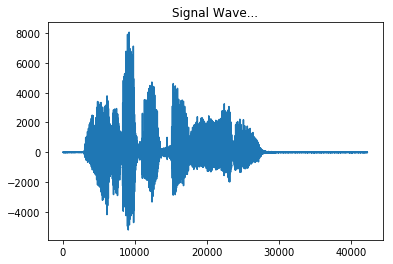

In [74]:
path = "../data/external/st_american/m0005_us_m0005_00431.wav"
wav_file_plot(path)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


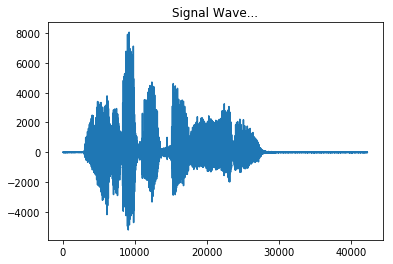

In [21]:
path = "../data/external/st_american/f0001_us_f0001_00002.wav"
wav_file_plot(path)

[[  7.89791922 -16.60134012  -3.78364437 ...  -2.78772315 -11.32509275
    3.29344033]
 [  7.96925885 -16.40861405  -3.69300869 ...  -4.54525895 -10.31476475
    2.04457443]
 [  7.88494753 -18.77541981  -4.46757095 ...  -6.66606975 -11.9621508
    1.00915353]
 ...
 [  7.97600467 -18.95365668   4.31379926 ...  -1.98218929  -5.23501104
   -0.09220987]
 [  8.02720312 -19.48619762   3.40299342 ...  -5.4305083  -10.83882452
   -1.09510218]
 [  7.83892919 -20.29773751   3.40618264 ...  -4.65107921  -2.36623238
    4.80055829]]


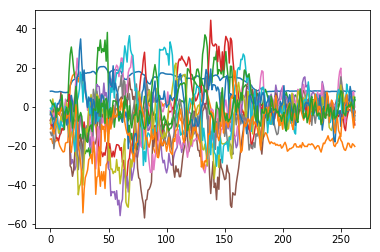

In [22]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
(rate,sig) = wav.read("../data/external/st_american/m0005_us_m0005_00431.wav")
mfcc_feat = mfcc(sig,rate)

print(mfcc_feat)
plt.plot(mfcc_feat)
plt.show()

Gaussian Mixture Model for Gender Identification from Voice Samples

In [ ]:
df['new']=''

In [ ]:
from random import seed
from random import random
# seed random number generator
seed(1)
for i in range(len(df)):
    df['new'][i]=[random()]

In [ ]:
df.head()

In [75]:
wav, sr = librosa.load(df['path'][0])
print('sr:', sr)
print ('wav shape:', wav.shape)

sr: 22050
wav shape: (122598,)


In [77]:
length = wav.shape[0]/float(sr)
length

5.56

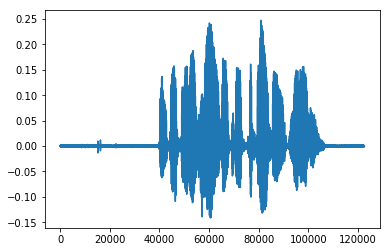

In [78]:
plt.plot(wav)

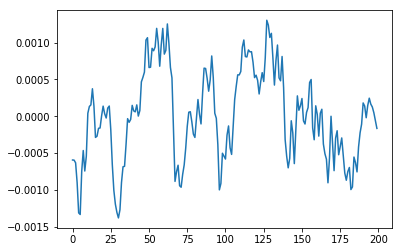

In [79]:
plt.plot(wav[4000:4200])

In [80]:
DATA_DIR = '../data/external/st_american/'

In [85]:
X = []
y = []
count = 1
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
for fname in os.listdir(DATA_DIR):
    struct = fname.split('_')
    print(struct)
    gender = struct[0]
    if gender[0] == 'f':
        gender = 0
    elif gender[0] == 'm':
        gender = 1
    wav, sr = librosa.load(DATA_DIR + fname)
    padded = pad(wav, 30000)
    X.append(padded)
    y.append(gender)
    count+=1
    print(count)
X = np.vstack(X)
y = np.array(y)
print('X:', X.shape)
print ('y:', y.shape)

['f0001', 'us', 'f0001', '00001.wav']
2
['f0001', 'us', 'f0001', '00002.wav']
3
['f0001', 'us', 'f0001', '00003.wav']
4
['f0001', 'us', 'f0001', '00004.wav']
5
['f0001', 'us', 'f0001', '00005.wav']
6
['f0001', 'us', 'f0001', '00006.wav']
7
['f0001', 'us', 'f0001', '00007.wav']
8
['f0001', 'us', 'f0001', '00008.wav']
9
['f0001', 'us', 'f0001', '00009.wav']
10
['f0001', 'us', 'f0001', '00010.wav']
11
['f0001', 'us', 'f0001', '00011.wav']
12
['f0001', 'us', 'f0001', '00012.wav']
13
['f0001', 'us', 'f0001', '00013.wav']
14
['f0001', 'us', 'f0001', '00014.wav']
15
['f0001', 'us', 'f0001', '00015.wav']
16
['f0001', 'us', 'f0001', '00016.wav']
17
['f0001', 'us', 'f0001', '00017.wav']
18
['f0001', 'us', 'f0001', '00018.wav']
19
['f0001', 'us', 'f0001', '00019.wav']
20
['f0001', 'us', 'f0001', '00020.wav']
21
['f0001', 'us', 'f0001', '00021.wav']
22
['f0001', 'us', 'f0001', '00022.wav']
23
['f0001', 'us', 'f0001', '00023.wav']
24
['f0001', 'us', 'f0001', '00024.wav']
25
['f0001', 'us', 'f0001',

199
['f0001', 'us', 'f0001', '00199.wav']
200
['f0001', 'us', 'f0001', '00200.wav']
201
['f0001', 'us', 'f0001', '00201.wav']
202
['f0001', 'us', 'f0001', '00202.wav']
203
['f0001', 'us', 'f0001', '00203.wav']
204
['f0001', 'us', 'f0001', '00204.wav']
205
['f0001', 'us', 'f0001', '00205.wav']
206
['f0001', 'us', 'f0001', '00206.wav']
207
['f0001', 'us', 'f0001', '00207.wav']
208
['f0001', 'us', 'f0001', '00208.wav']
209
['f0001', 'us', 'f0001', '00209.wav']
210
['f0001', 'us', 'f0001', '00210.wav']
211
['f0001', 'us', 'f0001', '00211.wav']
212
['f0001', 'us', 'f0001', '00212.wav']
213
['f0001', 'us', 'f0001', '00213.wav']
214
['f0001', 'us', 'f0001', '00214.wav']
215
['f0001', 'us', 'f0001', '00215.wav']
216
['f0001', 'us', 'f0001', '00216.wav']
217
['f0001', 'us', 'f0001', '00217.wav']
218
['f0001', 'us', 'f0001', '00218.wav']
219
['f0001', 'us', 'f0001', '00219.wav']
220
['f0001', 'us', 'f0001', '00220.wav']
221
['f0001', 'us', 'f0001', '00221.wav']
222
['f0001', 'us', 'f0001', '0022

396
['f0001', 'us', 'f0001', '00396.wav']
397
['f0001', 'us', 'f0001', '00397.wav']
398
['f0001', 'us', 'f0001', '00398.wav']
399
['f0001', 'us', 'f0001', '00399.wav']
400
['f0001', 'us', 'f0001', '00400.wav']
401
['f0001', 'us', 'f0001', '00401.wav']
402
['f0001', 'us', 'f0001', '00402.wav']
403
['f0001', 'us', 'f0001', '00403.wav']
404
['f0001', 'us', 'f0001', '00404.wav']
405
['f0001', 'us', 'f0001', '00405.wav']
406
['f0001', 'us', 'f0001', '00406.wav']
407
['f0001', 'us', 'f0001', '00407.wav']
408
['f0001', 'us', 'f0001', '00408.wav']
409
['f0001', 'us', 'f0001', '00409.wav']
410
['f0001', 'us', 'f0001', '00410.wav']
411
['f0001', 'us', 'f0001', '00411.wav']
412
['f0001', 'us', 'f0001', '00412.wav']
413
['f0001', 'us', 'f0001', '00413.wav']
414
['f0001', 'us', 'f0001', '00414.wav']
415
['f0001', 'us', 'f0001', '00415.wav']
416
['f0001', 'us', 'f0001', '00416.wav']
417
['f0001', 'us', 'f0001', '00417.wav']
418
['f0001', 'us', 'f0001', '00418.wav']
419
['f0001', 'us', 'f0001', '0041

592
['f0002', 'us', 'f0002', '00151.wav']
593
['f0002', 'us', 'f0002', '00152.wav']
594
['f0002', 'us', 'f0002', '00153.wav']
595
['f0002', 'us', 'f0002', '00154.wav']
596
['f0002', 'us', 'f0002', '00155.wav']
597
['f0002', 'us', 'f0002', '00156.wav']
598
['f0002', 'us', 'f0002', '00157.wav']
599
['f0002', 'us', 'f0002', '00158.wav']
600
['f0002', 'us', 'f0002', '00159.wav']
601
['f0002', 'us', 'f0002', '00160.wav']
602
['f0002', 'us', 'f0002', '00161.wav']
603
['f0002', 'us', 'f0002', '00162.wav']
604
['f0002', 'us', 'f0002', '00163.wav']
605
['f0002', 'us', 'f0002', '00164.wav']
606
['f0002', 'us', 'f0002', '00165.wav']
607
['f0002', 'us', 'f0002', '00166.wav']
608
['f0002', 'us', 'f0002', '00167.wav']
609
['f0002', 'us', 'f0002', '00168.wav']
610
['f0002', 'us', 'f0002', '00169.wav']
611
['f0002', 'us', 'f0002', '00170.wav']
612
['f0002', 'us', 'f0002', '00171.wav']
613
['f0002', 'us', 'f0002', '00172.wav']
614
['f0002', 'us', 'f0002', '00173.wav']
615
['f0002', 'us', 'f0002', '0017

788
['f0002', 'us', 'f0002', '00347.wav']
789
['f0002', 'us', 'f0002', '00348.wav']
790
['f0002', 'us', 'f0002', '00349.wav']
791
['f0002', 'us', 'f0002', '00350.wav']
792
['f0002', 'us', 'f0002', '00351.wav']
793
['f0002', 'us', 'f0002', '00352.wav']
794
['f0002', 'us', 'f0002', '00353.wav']
795
['f0002', 'us', 'f0002', '00354.wav']
796
['f0002', 'us', 'f0002', '00355.wav']
797
['f0002', 'us', 'f0002', '00356.wav']
798
['f0002', 'us', 'f0002', '00357.wav']
799
['f0002', 'us', 'f0002', '00358.wav']
800
['f0002', 'us', 'f0002', '00359.wav']
801
['f0002', 'us', 'f0002', '00360.wav']
802
['f0002', 'us', 'f0002', '00361.wav']
803
['f0002', 'us', 'f0002', '00362.wav']
804
['f0002', 'us', 'f0002', '00363.wav']
805
['f0002', 'us', 'f0002', '00364.wav']
806
['f0002', 'us', 'f0002', '00365.wav']
807
['f0002', 'us', 'f0002', '00366.wav']
808
['f0002', 'us', 'f0002', '00367.wav']
809
['f0002', 'us', 'f0002', '00368.wav']
810
['f0002', 'us', 'f0002', '00369.wav']
811
['f0002', 'us', 'f0002', '0037

985
['f0003', 'us', 'f0003', '00143.wav']
986
['f0003', 'us', 'f0003', '00144.wav']
987
['f0003', 'us', 'f0003', '00145.wav']
988
['f0003', 'us', 'f0003', '00146.wav']
989
['f0003', 'us', 'f0003', '00147.wav']
990
['f0003', 'us', 'f0003', '00148.wav']
991
['f0003', 'us', 'f0003', '00149.wav']
992
['f0003', 'us', 'f0003', '00150.wav']
993
['f0003', 'us', 'f0003', '00151.wav']
994
['f0003', 'us', 'f0003', '00152.wav']
995
['f0003', 'us', 'f0003', '00153.wav']
996
['f0003', 'us', 'f0003', '00154.wav']
997
['f0003', 'us', 'f0003', '00155.wav']
998
['f0003', 'us', 'f0003', '00156.wav']
999
['f0003', 'us', 'f0003', '00157.wav']
1000
['f0003', 'us', 'f0003', '00158.wav']
1001
['f0003', 'us', 'f0003', '00159.wav']
1002
['f0003', 'us', 'f0003', '00160.wav']
1003
['f0003', 'us', 'f0003', '00161.wav']
1004
['f0003', 'us', 'f0003', '00162.wav']
1005
['f0003', 'us', 'f0003', '00163.wav']
1006
['f0003', 'us', 'f0003', '00164.wav']
1007
['f0003', 'us', 'f0003', '00165.wav']
1008
['f0003', 'us', 'f000

1176
['f0003', 'us', 'f0003', '00334.wav']
1177
['f0003', 'us', 'f0003', '00335.wav']
1178
['f0003', 'us', 'f0003', '00336.wav']
1179
['f0003', 'us', 'f0003', '00337.wav']
1180
['f0003', 'us', 'f0003', '00338.wav']
1181
['f0003', 'us', 'f0003', '00339.wav']
1182
['f0003', 'us', 'f0003', '00340.wav']
1183
['f0003', 'us', 'f0003', '00341.wav']
1184
['f0003', 'us', 'f0003', '00342.wav']
1185
['f0003', 'us', 'f0003', '00343.wav']
1186
['f0003', 'us', 'f0003', '00344.wav']
1187
['f0003', 'us', 'f0003', '00345.wav']
1188
['f0003', 'us', 'f0003', '00346.wav']
1189
['f0003', 'us', 'f0003', '00347.wav']
1190
['f0003', 'us', 'f0003', '00348.wav']
1191
['f0003', 'us', 'f0003', '00349.wav']
1192
['f0003', 'us', 'f0003', '00350.wav']
1193
['f0003', 'us', 'f0003', '00351.wav']
1194
['f0003', 'us', 'f0003', '00352.wav']
1195
['f0003', 'us', 'f0003', '00353.wav']
1196
['f0003', 'us', 'f0003', '00354.wav']
1197
['f0003', 'us', 'f0003', '00355.wav']
1198
['f0003', 'us', 'f0003', '00356.wav']
1199
['f000

1367
['f0004', 'us', 'f0004', '00066.wav']
1368
['f0004', 'us', 'f0004', '00067.wav']
1369
['f0004', 'us', 'f0004', '00068.wav']
1370
['f0004', 'us', 'f0004', '00069.wav']
1371
['f0004', 'us', 'f0004', '00070.wav']
1372
['f0004', 'us', 'f0004', '00071.wav']
1373
['f0004', 'us', 'f0004', '00072.wav']
1374
['f0004', 'us', 'f0004', '00073.wav']
1375
['f0004', 'us', 'f0004', '00074.wav']
1376
['f0004', 'us', 'f0004', '00075.wav']
1377
['f0004', 'us', 'f0004', '00076.wav']
1378
['f0004', 'us', 'f0004', '00077.wav']
1379
['f0004', 'us', 'f0004', '00078.wav']
1380
['f0004', 'us', 'f0004', '00079.wav']
1381
['f0004', 'us', 'f0004', '00080.wav']
1382
['f0004', 'us', 'f0004', '00081.wav']
1383
['f0004', 'us', 'f0004', '00082.wav']
1384
['f0004', 'us', 'f0004', '00083.wav']
1385
['f0004', 'us', 'f0004', '00084.wav']
1386
['f0004', 'us', 'f0004', '00085.wav']
1387
['f0004', 'us', 'f0004', '00086.wav']
1388
['f0004', 'us', 'f0004', '00087.wav']
1389
['f0004', 'us', 'f0004', '00088.wav']
1390
['f000

1559
['f0004', 'us', 'f0004', '00258.wav']
1560
['f0004', 'us', 'f0004', '00259.wav']
1561
['f0004', 'us', 'f0004', '00260.wav']
1562
['f0004', 'us', 'f0004', '00261.wav']
1563
['f0004', 'us', 'f0004', '00262.wav']
1564
['f0004', 'us', 'f0004', '00263.wav']
1565
['f0004', 'us', 'f0004', '00264.wav']
1566
['f0004', 'us', 'f0004', '00265.wav']
1567
['f0004', 'us', 'f0004', '00266.wav']
1568
['f0004', 'us', 'f0004', '00267.wav']
1569
['f0004', 'us', 'f0004', '00268.wav']
1570
['f0004', 'us', 'f0004', '00269.wav']
1571
['f0004', 'us', 'f0004', '00270.wav']
1572
['f0004', 'us', 'f0004', '00271.wav']
1573
['f0004', 'us', 'f0004', '00272.wav']
1574
['f0004', 'us', 'f0004', '00273.wav']
1575
['f0004', 'us', 'f0004', '00274.wav']
1576
['f0004', 'us', 'f0004', '00275.wav']
1577
['f0004', 'us', 'f0004', '00276.wav']
1578
['f0004', 'us', 'f0004', '00277.wav']
1579
['f0004', 'us', 'f0004', '00278.wav']
1580
['f0004', 'us', 'f0004', '00279.wav']
1581
['f0004', 'us', 'f0004', '00280.wav']
1582
['f000

1751
['f0005', 'us', 'f0005', '00004.wav']
1752
['f0005', 'us', 'f0005', '00005.wav']
1753
['f0005', 'us', 'f0005', '00006.wav']
1754
['f0005', 'us', 'f0005', '00007.wav']
1755
['f0005', 'us', 'f0005', '00008.wav']
1756
['f0005', 'us', 'f0005', '00009.wav']
1757
['f0005', 'us', 'f0005', '00010.wav']
1758
['f0005', 'us', 'f0005', '00011.wav']
1759
['f0005', 'us', 'f0005', '00012.wav']
1760
['f0005', 'us', 'f0005', '00013.wav']
1761
['f0005', 'us', 'f0005', '00014.wav']
1762
['f0005', 'us', 'f0005', '00015.wav']
1763
['f0005', 'us', 'f0005', '00016.wav']
1764
['f0005', 'us', 'f0005', '00017.wav']
1765
['f0005', 'us', 'f0005', '00018.wav']
1766
['f0005', 'us', 'f0005', '00019.wav']
1767
['f0005', 'us', 'f0005', '00020.wav']
1768
['f0005', 'us', 'f0005', '00021.wav']
1769
['f0005', 'us', 'f0005', '00022.wav']
1770
['f0005', 'us', 'f0005', '00023.wav']
1771
['f0005', 'us', 'f0005', '00024.wav']
1772
['f0005', 'us', 'f0005', '00025.wav']
1773
['f0005', 'us', 'f0005', '00026.wav']
1774
['f000

1942
['f0005', 'us', 'f0005', '00195.wav']
1943
['f0005', 'us', 'f0005', '00196.wav']
1944
['f0005', 'us', 'f0005', '00197.wav']
1945
['f0005', 'us', 'f0005', '00198.wav']
1946
['f0005', 'us', 'f0005', '00199.wav']
1947
['f0005', 'us', 'f0005', '00200.wav']
1948
['f0005', 'us', 'f0005', '00201.wav']
1949
['f0005', 'us', 'f0005', '00202.wav']
1950
['f0005', 'us', 'f0005', '00203.wav']
1951
['f0005', 'us', 'f0005', '00204.wav']
1952
['f0005', 'us', 'f0005', '00205.wav']
1953
['f0005', 'us', 'f0005', '00206.wav']
1954
['f0005', 'us', 'f0005', '00207.wav']
1955
['f0005', 'us', 'f0005', '00208.wav']
1956
['f0005', 'us', 'f0005', '00209.wav']
1957
['f0005', 'us', 'f0005', '00210.wav']
1958
['f0005', 'us', 'f0005', '00211.wav']
1959
['f0005', 'us', 'f0005', '00212.wav']
1960
['f0005', 'us', 'f0005', '00213.wav']
1961
['f0005', 'us', 'f0005', '00214.wav']
1962
['f0005', 'us', 'f0005', '00215.wav']
1963
['f0005', 'us', 'f0005', '00216.wav']
1964
['f0005', 'us', 'f0005', '00217.wav']
1965
['f000

2133
['f0005', 'us', 'f0005', '00387.wav']
2134
['f0005', 'us', 'f0005', '00388.wav']
2135
['f0005', 'us', 'f0005', '00389.wav']
2136
['f0005', 'us', 'f0005', '00390.wav']
2137
['f0005', 'us', 'f0005', '00391.wav']
2138
['f0005', 'us', 'f0005', '00392.wav']
2139
['f0005', 'us', 'f0005', '00393.wav']
2140
['f0005', 'us', 'f0005', '00394.wav']
2141
['f0005', 'us', 'f0005', '00395.wav']
2142
['f0005', 'us', 'f0005', '00396.wav']
2143
['f0005', 'us', 'f0005', '00397.wav']
2144
['f0005', 'us', 'f0005', '00398.wav']
2145
['f0005', 'us', 'f0005', '00399.wav']
2146
['f0005', 'us', 'f0005', '00400.wav']
2147
['f0005', 'us', 'f0005', '00401.wav']
2148
['f0005', 'us', 'f0005', '00402.wav']
2149
['f0005', 'us', 'f0005', '00403.wav']
2150
['f0005', 'us', 'f0005', '00404.wav']
2151
['f0005', 'us', 'f0005', '00405.wav']
2152
['f0005', 'us', 'f0005', '00406.wav']
2153
['f0005', 'us', 'f0005', '00407.wav']
2154
['f0005', 'us', 'f0005', '00408.wav']
2155
['f0005', 'us', 'f0005', '00409.wav']
2156
['f000

2324
['m0001', 'us', 'm0001', '00138.wav']
2325
['m0001', 'us', 'm0001', '00139.wav']
2326
['m0001', 'us', 'm0001', '00140.wav']
2327
['m0001', 'us', 'm0001', '00141.wav']
2328
['m0001', 'us', 'm0001', '00142.wav']
2329
['m0001', 'us', 'm0001', '00143.wav']
2330
['m0001', 'us', 'm0001', '00144.wav']
2331
['m0001', 'us', 'm0001', '00145.wav']
2332
['m0001', 'us', 'm0001', '00146.wav']
2333
['m0001', 'us', 'm0001', '00147.wav']
2334
['m0001', 'us', 'm0001', '00148.wav']
2335
['m0001', 'us', 'm0001', '00149.wav']
2336
['m0001', 'us', 'm0001', '00150.wav']
2337
['m0001', 'us', 'm0001', '00151.wav']
2338
['m0001', 'us', 'm0001', '00152.wav']
2339
['m0001', 'us', 'm0001', '00153.wav']
2340
['m0001', 'us', 'm0001', '00154.wav']
2341
['m0001', 'us', 'm0001', '00155.wav']
2342
['m0001', 'us', 'm0001', '00156.wav']
2343
['m0001', 'us', 'm0001', '00157.wav']
2344
['m0001', 'us', 'm0001', '00158.wav']
2345
['m0001', 'us', 'm0001', '00159.wav']
2346
['m0001', 'us', 'm0001', '00160.wav']
2347
['m000

2516
['m0002', 'us', 'm0002', '00002.wav']
2517
['m0002', 'us', 'm0002', '00003.wav']
2518
['m0002', 'us', 'm0002', '00004.wav']
2519
['m0002', 'us', 'm0002', '00005.wav']
2520
['m0002', 'us', 'm0002', '00006.wav']
2521
['m0002', 'us', 'm0002', '00007.wav']
2522
['m0002', 'us', 'm0002', '00008.wav']
2523
['m0002', 'us', 'm0002', '00009.wav']
2524
['m0002', 'us', 'm0002', '00010.wav']
2525
['m0002', 'us', 'm0002', '00011.wav']
2526
['m0002', 'us', 'm0002', '00012.wav']
2527
['m0002', 'us', 'm0002', '00013.wav']
2528
['m0002', 'us', 'm0002', '00014.wav']
2529
['m0002', 'us', 'm0002', '00015.wav']
2530
['m0002', 'us', 'm0002', '00016.wav']
2531
['m0002', 'us', 'm0002', '00017.wav']
2532
['m0002', 'us', 'm0002', '00018.wav']
2533
['m0002', 'us', 'm0002', '00019.wav']
2534
['m0002', 'us', 'm0002', '00020.wav']
2535
['m0002', 'us', 'm0002', '00021.wav']
2536
['m0002', 'us', 'm0002', '00022.wav']
2537
['m0002', 'us', 'm0002', '00023.wav']
2538
['m0002', 'us', 'm0002', '00024.wav']
2539
['m000

2707
['m0002', 'us', 'm0002', '00193.wav']
2708
['m0002', 'us', 'm0002', '00194.wav']
2709
['m0002', 'us', 'm0002', '00195.wav']
2710
['m0002', 'us', 'm0002', '00196.wav']
2711
['m0002', 'us', 'm0002', '00197.wav']
2712
['m0002', 'us', 'm0002', '00198.wav']
2713
['m0002', 'us', 'm0002', '00199.wav']
2714
['m0002', 'us', 'm0002', '00200.wav']
2715
['m0002', 'us', 'm0002', '00201.wav']
2716
['m0002', 'us', 'm0002', '00202.wav']
2717
['m0002', 'us', 'm0002', '00203.wav']
2718
['m0002', 'us', 'm0002', '00204.wav']
2719
['m0002', 'us', 'm0002', '00205.wav']
2720
['m0002', 'us', 'm0002', '00206.wav']
2721
['m0002', 'us', 'm0002', '00207.wav']
2722
['m0002', 'us', 'm0002', '00208.wav']
2723
['m0002', 'us', 'm0002', '00209.wav']
2724
['m0002', 'us', 'm0002', '00210.wav']
2725
['m0002', 'us', 'm0002', '00211.wav']
2726
['m0002', 'us', 'm0002', '00212.wav']
2727
['m0002', 'us', 'm0002', '00213.wav']
2728
['m0002', 'us', 'm0002', '00214.wav']
2729
['m0002', 'us', 'm0002', '00215.wav']
2730
['m000

2898
['m0003', 'us', 'm0003', '00027.wav']
2899
['m0003', 'us', 'm0003', '00028.wav']
2900
['m0003', 'us', 'm0003', '00029.wav']
2901
['m0003', 'us', 'm0003', '00030.wav']
2902
['m0003', 'us', 'm0003', '00031.wav']
2903
['m0003', 'us', 'm0003', '00032.wav']
2904
['m0003', 'us', 'm0003', '00033.wav']
2905
['m0003', 'us', 'm0003', '00034.wav']
2906
['m0003', 'us', 'm0003', '00035.wav']
2907
['m0003', 'us', 'm0003', '00036.wav']
2908
['m0003', 'us', 'm0003', '00037.wav']
2909
['m0003', 'us', 'm0003', '00038.wav']
2910
['m0003', 'us', 'm0003', '00039.wav']
2911
['m0003', 'us', 'm0003', '00040.wav']
2912
['m0003', 'us', 'm0003', '00041.wav']
2913
['m0003', 'us', 'm0003', '00042.wav']
2914
['m0003', 'us', 'm0003', '00043.wav']
2915
['m0003', 'us', 'm0003', '00044.wav']
2916
['m0003', 'us', 'm0003', '00045.wav']
2917
['m0003', 'us', 'm0003', '00046.wav']
2918
['m0003', 'us', 'm0003', '00047.wav']
2919
['m0003', 'us', 'm0003', '00048.wav']
2920
['m0003', 'us', 'm0003', '00049.wav']
2921
['m000

3090
['m0003', 'us', 'm0003', '00219.wav']
3091
['m0003', 'us', 'm0003', '00220.wav']
3092
['m0003', 'us', 'm0003', '00221.wav']
3093
['m0003', 'us', 'm0003', '00222.wav']
3094
['m0003', 'us', 'm0003', '00223.wav']
3095
['m0003', 'us', 'm0003', '00224.wav']
3096
['m0003', 'us', 'm0003', '00225.wav']
3097
['m0003', 'us', 'm0003', '00226.wav']
3098
['m0003', 'us', 'm0003', '00227.wav']
3099
['m0003', 'us', 'm0003', '00228.wav']
3100
['m0003', 'us', 'm0003', '00229.wav']
3101
['m0003', 'us', 'm0003', '00230.wav']
3102
['m0003', 'us', 'm0003', '00231.wav']
3103
['m0003', 'us', 'm0003', '00232.wav']
3104
['m0003', 'us', 'm0003', '00233.wav']
3105
['m0003', 'us', 'm0003', '00234.wav']
3106
['m0003', 'us', 'm0003', '00235.wav']
3107
['m0003', 'us', 'm0003', '00236.wav']
3108
['m0003', 'us', 'm0003', '00237.wav']
3109
['m0003', 'us', 'm0003', '00238.wav']
3110
['m0003', 'us', 'm0003', '00239.wav']
3111
['m0003', 'us', 'm0003', '00240.wav']
3112
['m0003', 'us', 'm0003', '00241.wav']
3113
['m000

3282
['m0004', 'us', 'm0004', '00059.wav']
3283
['m0004', 'us', 'm0004', '00060.wav']
3284
['m0004', 'us', 'm0004', '00061.wav']
3285
['m0004', 'us', 'm0004', '00062.wav']
3286
['m0004', 'us', 'm0004', '00063.wav']
3287
['m0004', 'us', 'm0004', '00064.wav']
3288
['m0004', 'us', 'm0004', '00065.wav']
3289
['m0004', 'us', 'm0004', '00066.wav']
3290
['m0004', 'us', 'm0004', '00067.wav']
3291
['m0004', 'us', 'm0004', '00068.wav']
3292
['m0004', 'us', 'm0004', '00069.wav']
3293
['m0004', 'us', 'm0004', '00070.wav']
3294
['m0004', 'us', 'm0004', '00071.wav']
3295
['m0004', 'us', 'm0004', '00072.wav']
3296
['m0004', 'us', 'm0004', '00073.wav']
3297
['m0004', 'us', 'm0004', '00074.wav']
3298
['m0004', 'us', 'm0004', '00075.wav']
3299
['m0004', 'us', 'm0004', '00076.wav']
3300
['m0004', 'us', 'm0004', '00077.wav']
3301
['m0004', 'us', 'm0004', '00078.wav']
3302
['m0004', 'us', 'm0004', '00079.wav']
3303
['m0004', 'us', 'm0004', '00080.wav']
3304
['m0004', 'us', 'm0004', '00081.wav']
3305
['m000

3473
['m0005', 'us', 'm0005', '00079.wav']
3474
['m0005', 'us', 'm0005', '00080.wav']
3475
['m0005', 'us', 'm0005', '00081.wav']
3476
['m0005', 'us', 'm0005', '00082.wav']
3477
['m0005', 'us', 'm0005', '00083.wav']
3478
['m0005', 'us', 'm0005', '00084.wav']
3479
['m0005', 'us', 'm0005', '00085.wav']
3480
['m0005', 'us', 'm0005', '00086.wav']
3481
['m0005', 'us', 'm0005', '00087.wav']
3482
['m0005', 'us', 'm0005', '00088.wav']
3483
['m0005', 'us', 'm0005', '00089.wav']
3484
['m0005', 'us', 'm0005', '00090.wav']
3485
['m0005', 'us', 'm0005', '00091.wav']
3486
['m0005', 'us', 'm0005', '00092.wav']
3487
['m0005', 'us', 'm0005', '00093.wav']
3488
['m0005', 'us', 'm0005', '00094.wav']
3489
['m0005', 'us', 'm0005', '00095.wav']
3490
['m0005', 'us', 'm0005', '00096.wav']
3491
['m0005', 'us', 'm0005', '00097.wav']
3492
['m0005', 'us', 'm0005', '00098.wav']
3493
['m0005', 'us', 'm0005', '00099.wav']
3494
['m0005', 'us', 'm0005', '00100.wav']
3495
['m0005', 'us', 'm0005', '00101.wav']
3496
['m000

3665
['m0005', 'us', 'm0005', '00271.wav']
3666
['m0005', 'us', 'm0005', '00272.wav']
3667
['m0005', 'us', 'm0005', '00273.wav']
3668
['m0005', 'us', 'm0005', '00274.wav']
3669
['m0005', 'us', 'm0005', '00275.wav']
3670
['m0005', 'us', 'm0005', '00276.wav']
3671
['m0005', 'us', 'm0005', '00277.wav']
3672
['m0005', 'us', 'm0005', '00278.wav']
3673
['m0005', 'us', 'm0005', '00279.wav']
3674
['m0005', 'us', 'm0005', '00280.wav']
3675
['m0005', 'us', 'm0005', '00281.wav']
3676
['m0005', 'us', 'm0005', '00282.wav']
3677
['m0005', 'us', 'm0005', '00283.wav']
3678
['m0005', 'us', 'm0005', '00284.wav']
3679
['m0005', 'us', 'm0005', '00285.wav']
3680
['m0005', 'us', 'm0005', '00286.wav']
3681
['m0005', 'us', 'm0005', '00287.wav']
3682
['m0005', 'us', 'm0005', '00288.wav']
3683
['m0005', 'us', 'm0005', '00289.wav']
3684
['m0005', 'us', 'm0005', '00290.wav']
3685
['m0005', 'us', 'm0005', '00291.wav']
3686
['m0005', 'us', 'm0005', '00292.wav']
3687
['m0005', 'us', 'm0005', '00293.wav']
3688
['m000

NoBackendError: 

In [86]:
len(X)

3842

In [2]:
save('../data/processed/X.npy', X)
save('../data/processed/y.npy', y)

NameError: name 'X' is not defined

In [11]:
# load array
X = load('../data/processed/X.npy')
y = load('../data/processed/y.npy')
# print the array
print(X)
print(y)

[[ 3.2625763e-07 -9.9985378e-08 -2.8739592e-07 ...  4.1776087e-02
   4.6450790e-02  5.2830242e-02]
 [-2.0509155e-07  2.2458929e-07 -1.6672965e-08 ... -4.6494599e-03
  -1.9162121e-03 -1.1861909e-03]
 [-1.4067475e-08  8.6283350e-08 -9.3908262e-08 ... -1.4703886e-02
  -1.5887441e-02 -1.5781634e-02]
 ...
 [ 4.9634199e-08  6.5954048e-08 -1.5520270e-07 ... -3.3078209e-02
  -4.8944402e-02  7.6672249e-02]
 [-8.7975440e-07  7.4930460e-07  1.5880526e-07 ...  3.7378292e-03
   4.8443745e-03  5.9400983e-03]
 [ 1.5328176e-07 -2.5137820e-07  1.1840478e-07 ... -6.1667655e-03
  -6.5376679e-03 -6.8509392e-03]]
[0 0 0 ... 1 1 1]


In [53]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X[0].shape)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics = ['acc'])
model.summary()


# model = Sequential()
# model.add(Dense, input=(X[0].shape))
# # ip = Input(shape=(X[0].shape))
# model.add(Dense(128, activation='relu'))
# model.Dense(1, activation='sigmoid')
# # model = Model(input=ip, output=op)
# model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 240008    
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 240,089
Trainable params: 240,089
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(X,
          y,
          epochs=30,
          batch_size=8, validation_split=0.20)

Train on 3073 samples, validate on 769 samples
Epoch 1/30
3073/3073 [==============================] - 1s 391us/step - loss: 0.6235 - accuracy: 0.7081 - val_loss: 1.2339 - val_accuracy: 0.0000e+00
Epoch 2/30
3073/3073 [==============================] - 1s 363us/step - loss: 0.5544 - accuracy: 0.7107 - val_loss: 1.5390 - val_accuracy: 0.0000e+00
Epoch 3/30
3073/3073 [==============================] - 1s 339us/step - loss: 0.5184 - accuracy: 0.7110 - val_loss: 1.8331 - val_accuracy: 0.0000e+00
Epoch 4/30
3073/3073 [==============================] - 1s 348us/step - loss: 0.4839 - accuracy: 0.7107 - val_loss: 2.3417 - val_accuracy: 0.0000e+00
Epoch 5/30
3073/3073 [==============================] - 1s 343us/step - loss: 0.4698 - accuracy: 0.7107 - val_loss: 2.8644 - val_accuracy: 0.0000e+00
Epoch 6/30
3073/3073 [==============================] - 1s 334us/step - loss: 0.4479 - accuracy: 0.7114 - val_loss: 3.4033 - val_accuracy: 0.0000e+00
Epoch 7/30
3073/3073 [==============================]

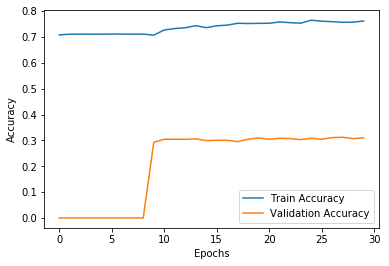

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


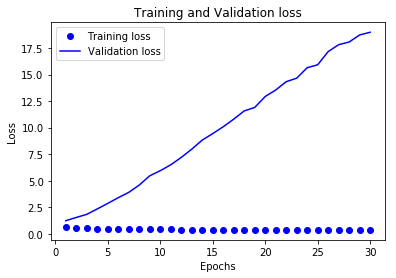

In [57]:
history_dict = history.history
print(history_dict.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

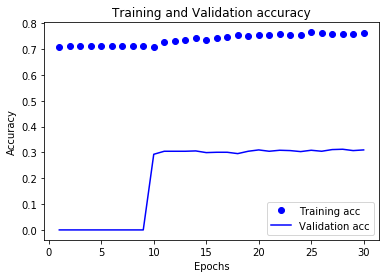

In [58]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def get_mfcc(audio_path):
        rate, audio  = read(audio_path)
        mfcc_feature = mfcc(audio, rate, winlen = 0.05, winstep = 0.01, numcep = 5, nfilt = 30, nfft = 800, appendEnergy = True)
        mfcc_feature  = preprocessing.scale(mfcc_feature)
        deltas        = delta(mfcc_feature, 2)
        double_deltas = delta(deltas, 2)
        combined      = np.hstack((mfcc_feature, deltas, double_deltas))
        return combined
audio_file_path = '../data/external/st_american/m0005_us_m0005_00431.wav'
len(get_mfcc(audio_file_path))
print(get_mfcc(audio_file_path))
for i in range(len(df['path'])):
    df['mfcc'][i] = get_mfcc(df['path'][i])